In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [19]:
# Load images
industrial_img = cv2.imread('C:/Users/samar/Downloads/industrial objects.jpg')
natural_img = cv2.imread('C:/Users/samar/Downloads/natural scenes.jpg')
geometric_img = cv2.imread('C:/Users/samar/Downloads/geometric shapes.jpg')

# Convert to grayscale
industrial_gray = cv2.cvtColor(industrial_img, cv2.COLOR_BGR2GRAY)
natural_gray = cv2.cvtColor(natural_img, cv2.COLOR_BGR2GRAY)
geometric_gray = cv2.cvtColor(geometric_img, cv2.COLOR_BGR2GRAY)


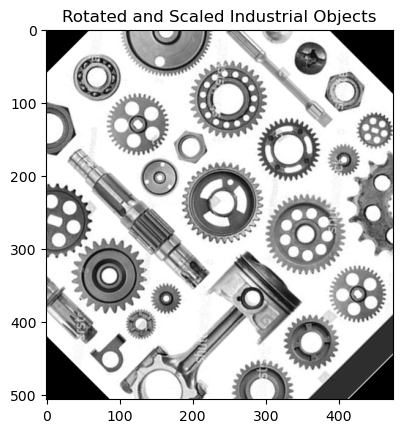

In [15]:
# Rotate and scale image using cv2.getRotationMatrix2D
def rotate_and_scale(image, angle, scale):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, scale)
    return cv2.warpAffine(image, matrix, (w, h))

rotated_scaled_industrial = rotate_and_scale(industrial_gray, 45, 1.2)

plt.imshow(rotated_scaled_industrial, cmap='gray')
plt.title("Rotated and Scaled Industrial Objects")
plt.show()


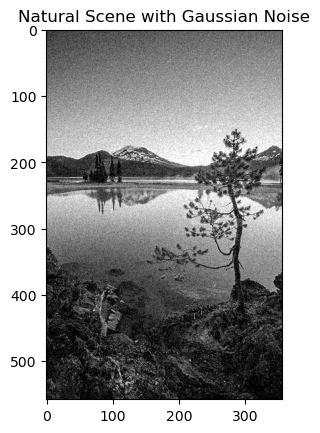

In [13]:
def add_gaussian_noise(image):
    row, col = image.shape
    mean = 0
    sigma = 15
    gauss = np.random.normal(mean, sigma, (row, col)).reshape(row, col)
    noisy = image + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

noisy_natural = add_gaussian_noise(natural_gray)

plt.imshow(noisy_natural, cmap='gray')
plt.title("Natural Scene with Gaussian Noise")
plt.show()


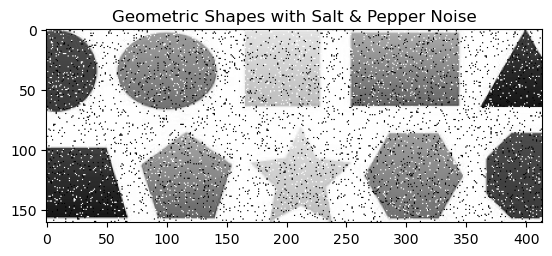

In [19]:
def add_salt_pepper_noise(image, prob):
    noisy = np.copy(image)
    black = 0
    white = 255
    probs = np.random.rand(image.shape[0], image.shape[1])
    noisy[probs < prob] = black
    noisy[probs > 1 - prob] = white
    return noisy

salt_pepper_geometric = add_salt_pepper_noise(geometric_gray, 0.05)

plt.imshow(salt_pepper_geometric, cmap='gray')
plt.title("Geometric Shapes with Salt & Pepper Noise")
plt.show()


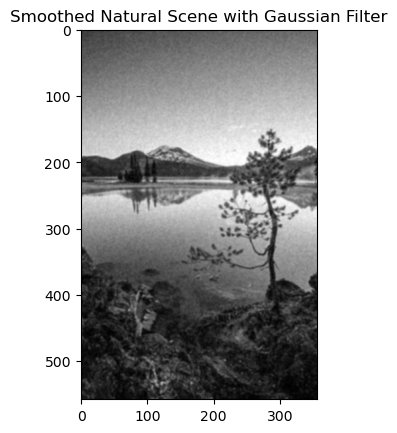

In [25]:
def apply_gaussian_filter(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

smoothed_natural = apply_gaussian_filter(noisy_natural)

plt.imshow(smoothed_natural, cmap='gray')
plt.title("Smoothed Natural Scene with Gaussian Filter")
plt.show()


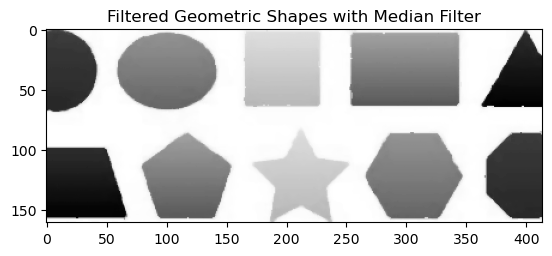

In [23]:
def apply_median_filter(image):
    return cv2.medianBlur(image, 5)

filtered_geometric = apply_median_filter(salt_pepper_geometric)

plt.imshow(filtered_geometric, cmap='gray')
plt.title("Filtered Geometric Shapes with Median Filter")
plt.show()


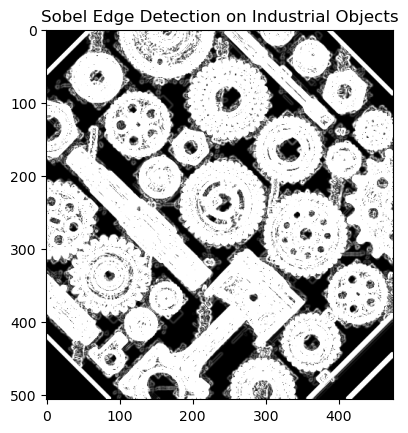

In [25]:
def sobel_edge_detection(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    sobel = np.hypot(sobelx, sobely)
    return np.clip(sobel, 0, 255).astype(np.uint8)

sobel_industrial = sobel_edge_detection(rotated_scaled_industrial)

plt.imshow(sobel_industrial, cmap='gray')
plt.title("Sobel Edge Detection on Industrial Objects")
plt.show()


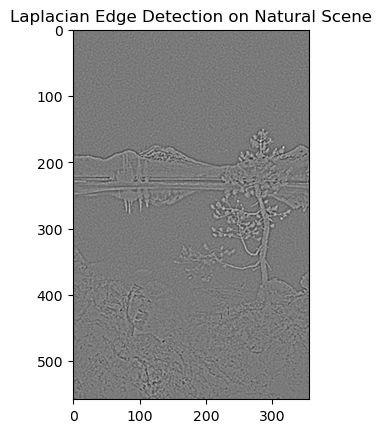

In [27]:
def laplacian_edge_detection(image):
    return cv2.Laplacian(image, cv2.CV_64F)

laplacian_natural = laplacian_edge_detection(smoothed_natural)

plt.imshow(laplacian_natural, cmap='gray')
plt.title("Laplacian Edge Detection on Natural Scene")
plt.show()


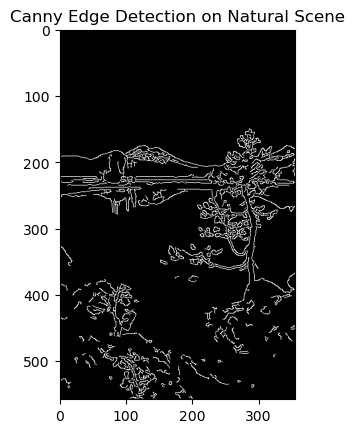

In [27]:
def canny_edge_detection(image, low_threshold, high_threshold):
    return cv2.Canny(image, low_threshold, high_threshold)

# Apply Canny edge detection to the smoothed natural scene
canny_natural = canny_edge_detection(smoothed_natural, 100, 200)

plt.imshow(canny_natural, cmap='gray')
plt.title("Canny Edge Detection on Natural Scene")
plt.show()
